# PROYECTO DE DATA SCIENCE - María Victoria Arbeletche

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Entendimiento del problema: Comprender el contexto, la necesidad a cubrir y definir el objetivo

El objetivo de este proyecto es lograr aumentar las ventas para lo cual resulta fundamental entender/conocer al consumidor de productos online en Brasil. Es decir lograr definir que tipo de consumidor se ve atraido por nuestra oferta de productos online, y que variables influyen sobre la desicion final de comprar, puede ser la localización del vendedor/comprador , el precio del producto, el costo del envio, el tiempo que tarda el envio del producto, las caracteristicas del producto etc. También al tener reseñas de los clientes podemos determinar que productos tienen una recepcion positiva y con cuales el cliente esta insatisfecho.


###  - Definición del Objetivo:

Lograr segmentar a los clientes que compran online en base a las caracteristicas de sus ordenes de compra (como puede ser, cuantos productos compran en cada orden, tamaño de los productos, precio de los mismos, donde esta localizado el cliente y donde el vendedor, que medio de pago usa, a que grupo pertenece el producto, en que momento del día/semana compra, descripcion del producto, cantidad de fotos del producto, tiempo de envio, etc), de modo tal de poder encontrar patrones comunes, lograndoo así enfocar mejor las publicidades / campañas de marketing con el objetivo final de aumentar las ventas online en Brasil.


### - Contexto Comercial

Somos una empresa de Marketing y publicidad, y el objetivo es orientar las campañas a cierto publico objetivo, de modo tal de lograr aumentar las ventas.

### - Problema Comercial

¿Existen ciertos patrones en los consumidores a la hora de comprar online?

### - Conexto Analitico

Contamos con datos de ~100.000 ordenes de compra proporcionados por la empresa.
Estamos frente a un problema de clusterizacion, dado que se trata de aprendizaje no supervizado (es decir no conocemos la variable de interes, de lo contrario hablariamos de un problema de clasificacion). Al utilizar algoritmo de cluster vamos a utilizar todas las variables disponibles para encontrar patrones en comun entre los consumidores / o las ordenes de compra de los consumidores y de esa manera armar grupos homogeneos hacia adentro. Un algoritmo posible para aplicar es K-means / dbscan.






# Extracción de datos: En este caso vamos a trabajar con una base de datos de e-comerce en Brazil con datos entre 2016 y 2018

### * Brazilian e-comerce dataset* :
Olist conecta pequeñas empresas de todo Brasil. Esos comerciantes pueden vender sus productos a través de la tienda Olist y enviarlos directamente a los clientes utilizando los socios logísticos de Olist. Vea más en nuestro sitio web: www.olist.com
Después de que un cliente compra el producto en Olist Store, se notifica al vendedor para que complete ese pedido. Una vez que el cliente recibe el producto, o vence la fecha estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota de la experiencia de compra y anotar algunos comentarios.
Un pedido puede tener varios artículos.
Cada artículo puede ser gestionado por un vendedor distinto.

**Data structure:**
Este dataset esta compuesto por 8 tablas que se conectan mediante order_id, product_id, seller_id, o zip code.

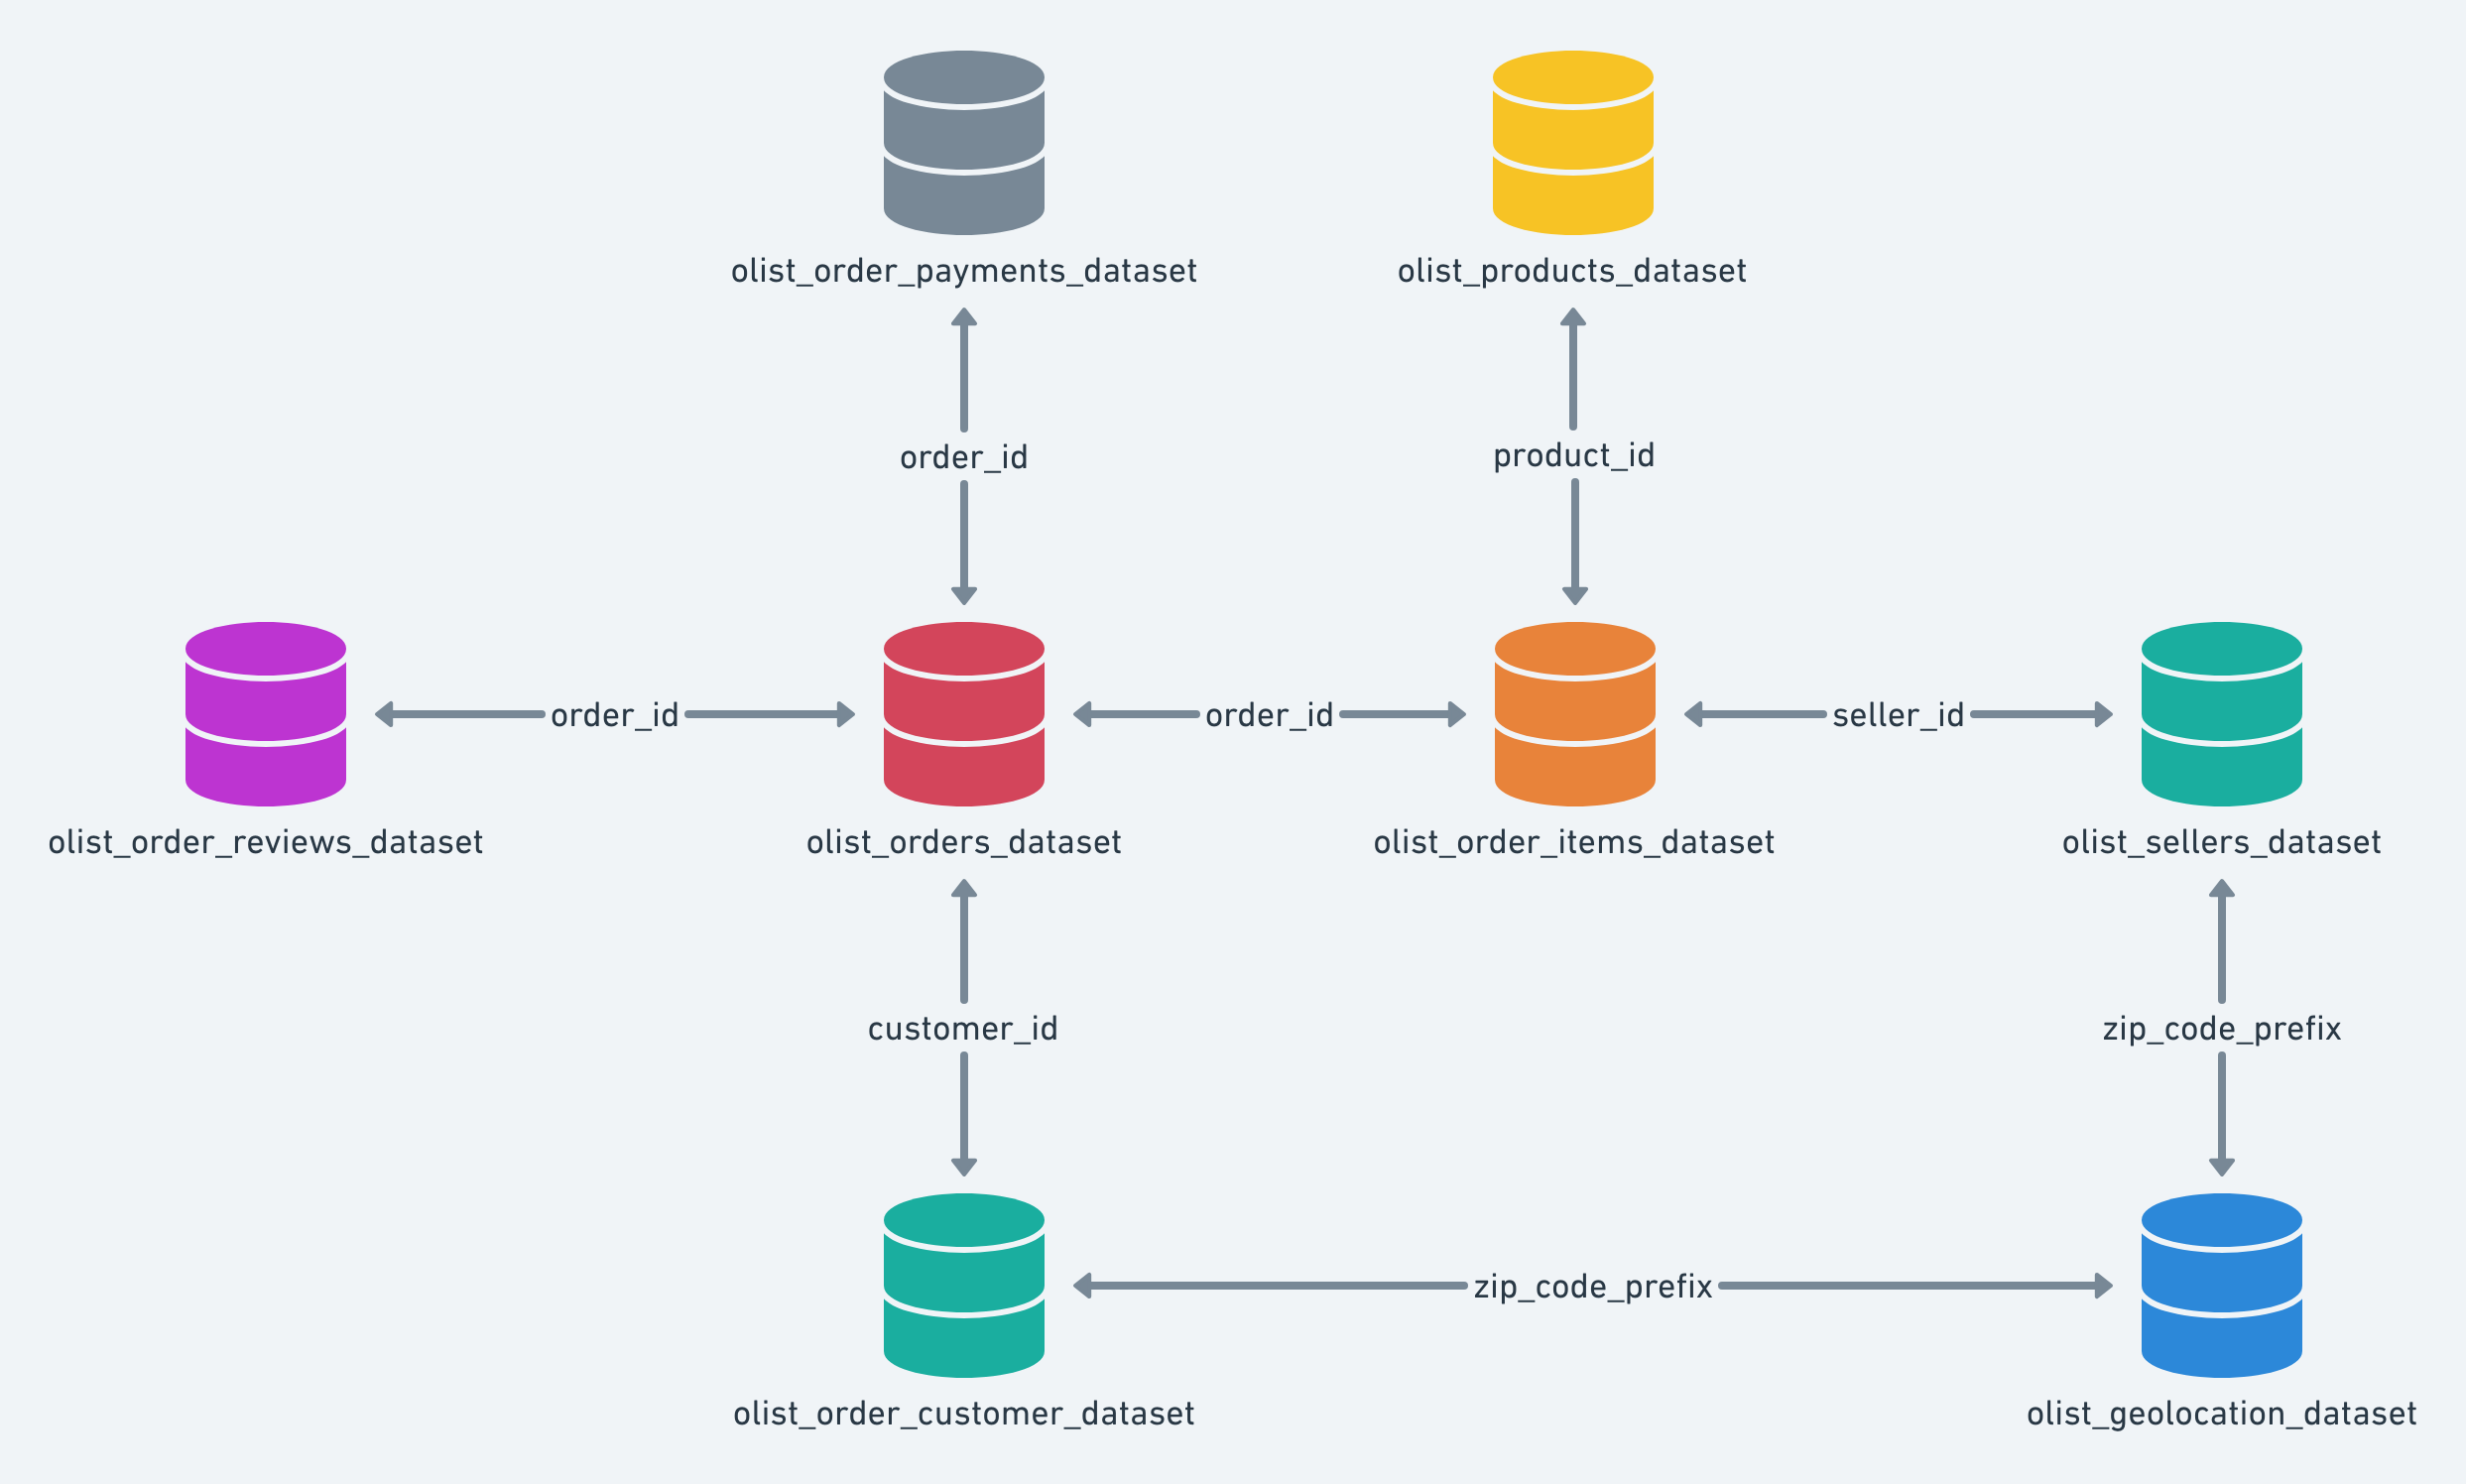

In [3]:
%cd '/content/gdrive/MyDrive'
##Import customers data: en esta tabla encontramos el id del comprador, el codigo postal, la ciudad y estado donde vive el mismo.
customers = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_customers_dataset.csv')
customers.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'}, inplace=True)
customers.head()


/content/gdrive/MyDrive


,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
##Import order items: En esta tabla encontramos el id de la orden de compra, del producto y del vendedor, el precio del producto, el valor de envio, y la fecha limite de entrega.
order_i = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_order_items_dataset.csv')
order_i.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
## Import geolocation: En esta tabla encontramos datos de localizacion como codigo postal, latitud y longitud, ciudad y estado
geo = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_geolocation_dataset.csv')
geo.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'}, inplace=True)
geo.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
##Import payments: En esta tabla encontramos datos de los metodos de pago de cada orden, y el valor del pago.
pay = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_order_payments_dataset.csv')
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
##Import Reviews: En esta tabla encontramos datos de opiniones y un score sobre la compra segun el order id.
review = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
## Import order status: En esta tabla encontramos datos sobre el estado de la orden, si fue enviado por ejemplo, y las fechas de compra, orden y envio.
order_s = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_orders_dataset.csv')
order_s.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
##Import Products data: En esta tabla encontramos caracteristicas de los productos, como categoria, peso, largo, cantidad de fotos y tamaño de la descripcion y nombre del producto.
product = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_products_dataset.csv')
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
## Import sellers: En esta tabla encotnramos datos de los vendedores,  su ciudad, estado y codigo postal.
seller = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/olist_sellers_dataset.csv')
seller.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'}, inplace=True)
seller.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
#Import product category: En esta tabla podemos encontrar el nombre en ingles de cada categoria de producto para poder mapear con el nombre en portugués.
product_cat = pd.read_csv('/content/gdrive/MyDrive/Data science /brazilian ecomerce/product_category_name_translation.csv')
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
#order_s.info()

In [13]:
#merge datasets: En este paso se unen las tablas seleccionadas dentro del total de tablas disponibles, las cuales son:
#Order: tabla con el detalle de cada compra
df1 = order_i.merge(order_s, on='order_id', how='inner')
#Product, tabla con la caracteristicas de los productos
df1 = df1.merge(product, on='product_id', how='inner')
df1 = df1.merge(product_cat, on='product_category_name', how='left')
#Customers: tabla con la caracteristica de los compradores
df1 = df1.merge(customers, on='customer_id', how='inner')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [14]:
#df1.head()

# DATA WRANGLING: (LIMPIEZA DE DATOS: Tratamiento de nulos, outliers, variables de texto etc)

El analisis grafico se realiza sobre la union de 3 data set de 'Brazilian e-comerce' estos son:
-Products dataset
-df1 dataset
-Order items dataset

In [15]:
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG


In [16]:
#transformamos los valores de los id en valores numericos para facilitar el manejo de la base

vars = ['order_id', 'seller_id', 'product_id', 'customer_id', 'customer_unique_id']

for var in vars:
  df1[var] = df1[var].astype('category')
  df1[var] = df1[var].cat.codes

df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,0,1,8628,854,2017-09-19 09:45:35,58.9,13.29,23516,delivered,2017-09-13 08:59:02,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,50398,28013,campos dos goytacazes,RJ
1,7352,1,8628,854,2017-07-05 02:44:11,55.9,17.96,89210,delivered,2017-06-28 11:52:20,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,5901,75800,jatai,GO
2,32057,1,8628,854,2018-05-23 10:56:25,64.9,18.33,30412,delivered,2018-05-18 10:25:53,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,19491,30720,belo horizonte,MG
3,42988,1,8628,854,2017-08-07 18:55:08,58.9,16.17,18604,delivered,2017-08-01 18:38:42,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,86518,83070,sao jose dos pinhais,PR
4,48148,1,8628,854,2017-08-16 22:05:11,58.9,13.29,56077,delivered,2017-08-10 21:48:40,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,4429,36400,conselheiro lafaiete,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,98635,1,9986,2543,2018-07-18 20:23:55,129.9,51.20,1958,delivered,2018-07-13 20:04:05,...,1.0,6700.0,35.0,12.0,22.0,garden_tools,60316,28740,conceicao de macabu,RJ
112646,98639,1,22725,25,2018-08-21 10:10:11,99.0,13.52,6845,delivered,2018-08-18 10:00:59,...,1.0,2300.0,37.0,30.0,20.0,furniture_decor,29175,83065,sao jose dos pinhais,PR
112647,98652,1,28524,1560,2017-06-07 17:05:23,736.0,20.91,86037,delivered,2017-06-01 16:53:03,...,3.0,400.0,19.0,9.0,15.0,watches_gifts,74813,27261,volta redonda,RJ
112648,98656,1,24163,1756,2017-12-22 17:31:42,229.9,44.02,63669,delivered,2017-12-18 16:33:07,...,2.0,2700.0,60.0,15.0,15.0,sports_leisure,15768,59955,tenente ananias,RN


In [17]:
#ORDER VARIABLES: En este paso se observa cuales son las observaciones de la variable order_status
#order status: delivered (entregado), shipped(enviado), canceled (cancelado), invoced(facturado), unavailable(no disponible), processing (en proceso), approved (aprobado)
df1['order_status'].unique()
df1['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [18]:
#ORDER STATUS- En este paso se transforma la variable de order_status (que indica si la orden se envio, se cancelo, se facturó etc) en una variable numerica para poder incluir en el modelo final.
df1['order_status'] = df1['order_status'].astype('category')
df1['order_status_num'] = df1['order_status'].cat.codes
df1['order_status_num'] = df1.apply(lambda x: 7 if x['order_status_num'] == 0 else x['order_status_num'], axis=1)
order = df1[['order_status', 'order_status_num']]
order.drop_duplicates(inplace=True)
order

<ipython-input-18-75e2b8e663e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order.drop_duplicates(inplace=True)


,order_status,order_status_num
0,delivered,2
27,shipped,5
390,canceled,1
433,invoiced,3
16110,processing,4
28638,unavailable,6
55200,approved,7


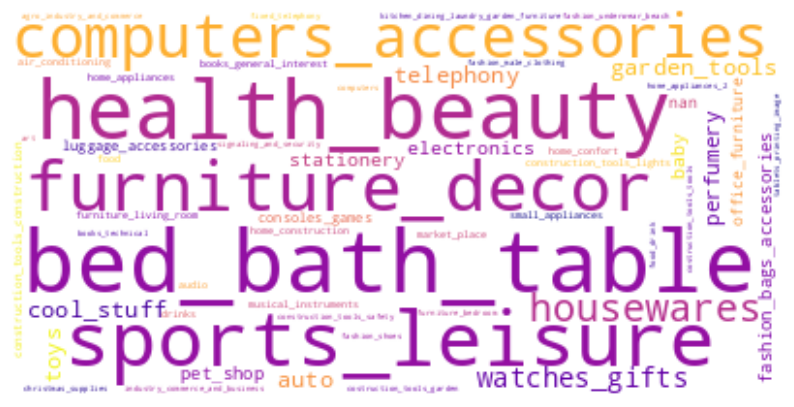

In [19]:
from wordcloud import WordCloud
df1['product_category_name_english']  = df1['product_category_name_english'].astype(str)
product_category_name_english = df1['product_category_name_english']

# Convert the Series to a single string
product_category_name_str = ' '.join(product_category_name_english)

# Create the word cloud
word_cloud2 = WordCloud(collocations = False, background_color = 'white', colormap='plasma').generate(product_category_name_str)

# Display the word cloud
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

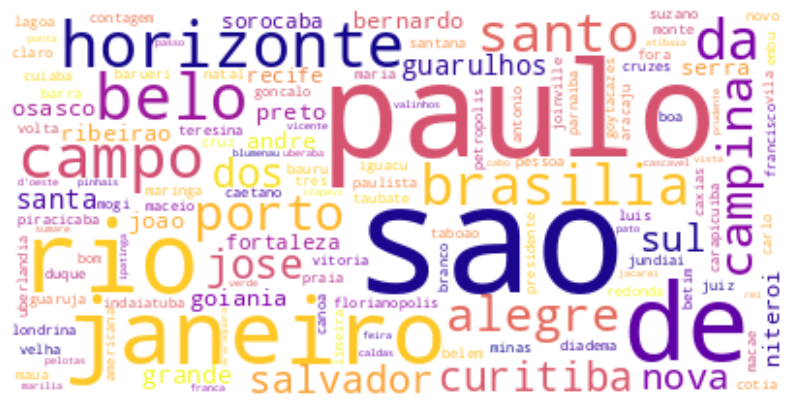

In [20]:
from wordcloud import WordCloud
df1['customer_city']  = df1['customer_city'].astype(str)

# Convert the Series to a single string
customer_city = ' '.join(df1['customer_city'].tolist())

# Create the word cloud
word_cloud2 = WordCloud(collocations = False, background_color = 'white', colormap='plasma').generate(customer_city)

# Display the word cloud
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [21]:
#PRODUCT CATEGORY NAMES: En este paso, se transforma la variable product_category_name en una variable numerica (creando categorias) para poder luego incluirla en el modelo final, ya que era una variable de texto.
df1['product_category_name'] = df1['product_category_name'].astype('category')
df1['product_category_name_num'] = df1['product_category_name'].cat.codes
df1['product_category_name_num'] = df1.apply(lambda x: 73 if x['product_category_name_num'] == 0 else x['product_category_name_num'], axis=1)
df1['product_category_name_num'] = df1.apply(lambda x: 99 if x['product_category_name_num'] == -1 else x['product_category_name_num'], axis=1)
pr = df1[['product_category_name', 'product_category_name_num']]
pr.drop_duplicates(inplace=True)
pr = pr.sort_values('product_category_name_num')
pr = pr.merge(product_cat, on='product_category_name', how='left')
pr

<ipython-input-21-d52d9bfddb9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr.drop_duplicates(inplace=True)


,product_category_name,product_category_name_num,product_category_name_english
0,alimentos,1,food
1,alimentos_bebidas,2,food_drink
2,artes,3,art
3,artes_e_artesanato,4,arts_and_craftmanship
4,artigos_de_festas,5,party_supplies
...,...,...,...
69,telefonia,70,telephony
70,telefonia_fixa,71,fixed_telephony
71,utilidades_domesticas,72,housewares
72,agro_industria_e_comercio,73,agro_industry_and_commerce


In [22]:
#CITY NAMES: En este paso se transforma la variable de customer_city en una variable numerica, para luego poder incluirla en el modelo final.
df1['customer_city'] = df1['customer_city'].astype('category')
df1['customer_city_num'] = df1['customer_city'].cat.codes
city = df1[['customer_city_num', 'customer_city']]
city.drop_duplicates(inplace=True)
city = city.sort_values('customer_city_num')
city

<ipython-input-22-b70d5363f41e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city.drop_duplicates(inplace=True)


,customer_city_num,customer_city
43359,0,abadia dos dourados
81709,1,abadiania
7958,2,abaete
3666,3,abaetetuba
11888,4,abaiara
...,...,...
13931,4105,xinguara
38451,4106,xique-xique
36549,4107,zacarias
43193,4108,ze doca


In [23]:
#STATE NAMES: En este paso se transforma la variable de customer_state en una variable numerica, para luego poder incluirla en el modelo final.
df1['customer_state'] = df1['customer_state'].astype('category')
df1['customer_state_num'] = df1['customer_state'].cat.codes
state = df1[['customer_state_num', 'customer_state']]
state.drop_duplicates(inplace=True)
state = state.sort_values('customer_state_num')
state

<ipython-input-23-0b9ff7f74ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state.drop_duplicates(inplace=True)


,customer_state_num,customer_state
1547,0,AC
173,1,AL
66,2,AM
3253,3,AP
5,4,BA
332,5,CE
12,6,DF
58,7,ES
1,8,GO
18,9,MA


In [24]:
#Edit dates: En este paso se transforman las variables de fecha al tipo datetime, y luego en base a esas se extraen nuevas variables como el mes, el quarter, el año, el día, el momento del día entre otras.
#Esto sera util para poder entender cuando compra cada tipo de consumidor.
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1['order_delivered_customer_date'] = pd.to_datetime(df1['order_delivered_customer_date'])
df1['order_estimated_delivery_date'] = pd.to_datetime(df1['order_estimated_delivery_date'])
df1['shipping_limit_date'] = pd.to_datetime(df1['shipping_limit_date'])

df1['year'] = df1['order_purchase_timestamp'].dt.year
df1['quarter'] = df1['order_purchase_timestamp'].dt.quarter
df1['month'] = df1['order_purchase_timestamp'].dt.month
df1['month_name'] = df1['order_purchase_timestamp'].dt.strftime('%B')
df1['day'] = df1['order_purchase_timestamp'].dt.day
df1['day_of_week'] = df1['order_purchase_timestamp'].dt.dayofweek
df1['day_name'] = df1['order_purchase_timestamp'].dt.strftime('%A')
df1['hour'] = df1['order_purchase_timestamp'].dt.hour
df1['timeday'] = pd.cut(df1['order_purchase_timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Dawn', 'Morning', 'Afternoon', 'Night'])

df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state_num,year,quarter,month,month_name,day,day_of_week,day_name,hour,timeday
0,0,1,8628,854,2017-09-19 09:45:35,58.9,13.29,23516,delivered,2017-09-13 08:59:02,...,18,2017,3,9,September,13,2,Wednesday,8,Morning
1,7352,1,8628,854,2017-07-05 02:44:11,55.9,17.96,89210,delivered,2017-06-28 11:52:20,...,8,2017,2,6,June,28,2,Wednesday,11,Morning
2,32057,1,8628,854,2018-05-23 10:56:25,64.9,18.33,30412,delivered,2018-05-18 10:25:53,...,10,2018,2,5,May,18,4,Friday,10,Morning
3,42988,1,8628,854,2017-08-07 18:55:08,58.9,16.17,18604,delivered,2017-08-01 18:38:42,...,17,2017,3,8,August,1,1,Tuesday,18,Afternoon
4,48148,1,8628,854,2017-08-16 22:05:11,58.9,13.29,56077,delivered,2017-08-10 21:48:40,...,10,2017,3,8,August,10,3,Thursday,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,98635,1,9986,2543,2018-07-18 20:23:55,129.9,51.20,1958,delivered,2018-07-13 20:04:05,...,18,2018,3,7,July,13,4,Friday,20,Night
112646,98639,1,22725,25,2018-08-21 10:10:11,99.0,13.52,6845,delivered,2018-08-18 10:00:59,...,17,2018,3,8,August,18,5,Saturday,10,Morning
112647,98652,1,28524,1560,2017-06-07 17:05:23,736.0,20.91,86037,delivered,2017-06-01 16:53:03,...,18,2017,2,6,June,1,3,Thursday,16,Afternoon
112648,98656,1,24163,1756,2017-12-22 17:31:42,229.9,44.02,63669,delivered,2017-12-18 16:33:07,...,19,2017,4,12,December,18,0,Monday,16,Afternoon


In [25]:
#df1.info()

In [26]:
#En este paso se seleccionan las variables que resultan importantes para el modelo final, dejando de lado aquellas que no aportan información importante o que estan duplicadas.
df1 = df1[['order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id', 'price', 'freight_value', 'order_status_num', 'product_category_name_num', 'year', 'quarter', 'month', 'month_name', 'day', 'day_of_week', 'day_name', 'hour', 'timeday','order_approved_at', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name', 'product_name_lenght', 'customer_city', 'customer_state']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   order_id                    112650 non-null  int32   
 1   order_item_id               112650 non-null  int64   
 2   product_id                  112650 non-null  int32   
 3   seller_id                   112650 non-null  int16   
 4   customer_id                 112650 non-null  int32   
 5   price                       112650 non-null  float64 
 6   freight_value               112650 non-null  float64 
 7   order_status_num            112650 non-null  int64   
 8   product_category_name_num   112650 non-null  int64   
 9   year                        112650 non-null  int32   
 10  quarter                     112650 non-null  int32   
 11  month                       112650 non-null  int32   
 12  month_name                  112650 non-null  object  
 13 

In [27]:
##Limipieza de outliers: En este paso se eliminan los casos extremos de las variables precio, y precio del envio. En este caso se eliminan todos aquellos valores por encima del percentil 95.
precio_q95 = df1['price'].quantile(0.95)
df1 = df1[df1['price'] < precio_q95]
envio_q95 = df1['freight_value'].quantile(0.95)
df1 = df1[df1['freight_value'] < envio_q95]



In [28]:
#CHECK nulls: en este paso se comprueba la cantidad de datos nulos en dos variables de interes
print(df1['order_approved_at'].isnull().sum())
print(df1['product_description_lenght'].isnull().sum())


14
1503


In [29]:
#dado que la base es losuficientemente grande y la variable con mayor cantidad de nulos tiene 1500 na, elimino todos los casos donde hay nullos
#Luego con un .info() podemos comprobar que todas las variables tengan la misma cantidad de datos no nullos y que nos hemos quedado con una base completa
#También se realiza un drop duplicates para que en caso de que haya filas duplicadas se elimine y quede solo una vez en la base
df1 = df1.dropna()
df1.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97656 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   order_id                    97656 non-null  int32   
 1   order_item_id               97656 non-null  int64   
 2   product_id                  97656 non-null  int32   
 3   seller_id                   97656 non-null  int16   
 4   customer_id                 97656 non-null  int32   
 5   price                       97656 non-null  float64 
 6   freight_value               97656 non-null  float64 
 7   order_status_num            97656 non-null  int64   
 8   product_category_name_num   97656 non-null  int64   
 9   year                        97656 non-null  int32   
 10  quarter                     97656 non-null  int32   
 11  month                       97656 non-null  int32   
 12  month_name                  97656 non-null  object  
 13  day                 

#  EXPLORATORY DATA ANALYSIS (EDA): Mediante las herramientas de visualizacion se busca entender la base de datos, y lograr obtener los primeros insights

In [30]:
##Matplotlib charts##
import matplotlib as mpl
import matplotlib.pyplot as plt
##seaborn charts##
import seaborn as sns

# Analisis sobre la cantidad de ordenes de compras en el tiempo (analisis por año, trimestre, mes, día y momento del día)

[Text(0, 0, '329'), Text(0, 0, '44300'), Text(0, 0, '53027')]

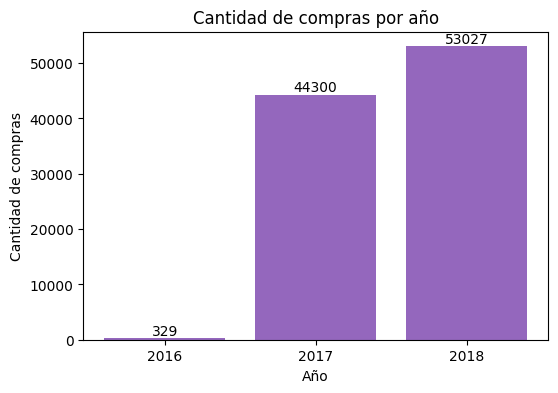

In [31]:
#Para analizar la cantidad de compras por cada año disponible en la base, se realiza un count de ordenes de compra agrupando por año, para luego realizar un grafico de barras.
compras = df1.groupby('year')['order_id'].count().reset_index()
compras['year'] = compras['year'].astype(int)
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(compras['year'].astype(str), compras['order_id'], color='C4')
ax.set_title('Cantidad de compras por año')
ax.set_ylabel('Cantidad de compras')
ax.set_xlabel('Año')
ax.bar_label(ax.containers[0])

En este grafico se busca analizar la evolucíon en el tiempo de la cantidad de compras online, lo que podemos ver es un incremento muy importante en 2017 y 2018 con respecto a 2016, lo cual también da lugar a duda de la cobertura de la base de datos en el año 2016.

<ipython-input-32-086db81a2659>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['year'] = df_q['year'].astype(str)
<ipython-input-32-086db81a2659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['quarter'] = df_q['quarter'].astype(str)
<ipython-input-32-086db81a2659>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2016 3'),
  Text(1, 0, '2016 4'),
  Text(2, 0, '2017 1'),
  Text(3, 0, '2017 2'),
  Text(4, 0, '2017 3'),
  Text(5, 0, '2017 4'),
  Text(6, 0, '2018 1'),
  Text(7, 0, '2018 2'),
  Text(8, 0, '2018 3')])

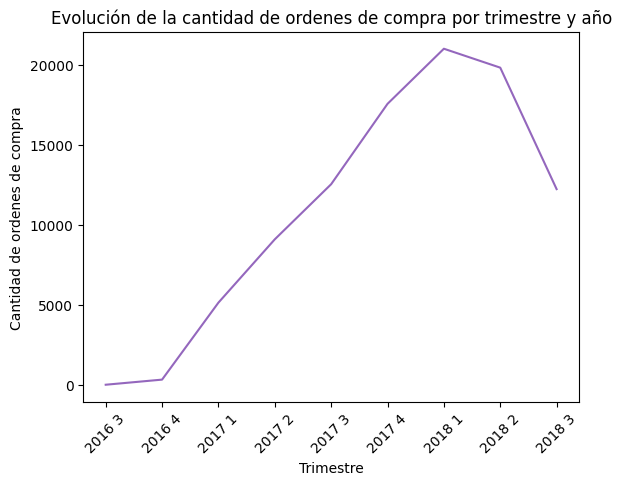

In [32]:
#Con el objetivo de conocer en mas profundidad los datos y comenzar a obtener ciertos insights, se analiza la cantidad de ordenes de compra por trimestre de cada año, para poder ver si existe cierta estacionalidad.
#Se crea una variable year-q que es una combinacion entre la variable de año y la de trimestre para luego realizar un count de ordenes de compra por year-q, y luego realizar un grfico exploratorio.
df_q = df1[['year', 'quarter','order_id']]
df_q['year'] = df_q['year'].astype(str)
df_q['quarter'] = df_q['quarter'].astype(str)
df_q['year-q'] = df_q['year'] +' ' + df_q['quarter']
quarter = df_q.groupby(['year-q'])['order_id'].count().reset_index()
quarter = quarter[quarter['year-q'] != 'n']
sns.lineplot(data=quarter, x='year-q', y='order_id', color ='C4')
plt.ylabel('Cantidad de ordenes de compra')
plt.xlabel('Trimestre')
plt.title('Evolución de la cantidad de ordenes de compra por trimestre y año')
plt.xticks(rotation=45)


En este grafico vemos la cantidad de ordenes de compra por trimestre para cada año. Lo que podemos ver es una tendencia creciente durante el año 2017, y para el año 2018 vemos que el total de ordenes de compra es mucho mayor desde el primer trimestre en comparación con 2017, pero luego de ve una caida desde el Q2 hasta el Q3. En lo que respecta a Q4 2018 no hay datos de compras. En cuanto al año 2016 solo hay datos disponibles para Q3 y Q4, aunque no podemos ver la evolcuión a lo largo de todo el año, vemos que la cantidad de compras es mucho menor a la del año 2017 en esos mismos periodos.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '2016 9'),
  Text(1, 0, '2016 10'),
  Text(2, 0, '2016 12'),
  Text(3, 0, '2017 1'),
  Text(4, 0, '2017 2'),
  Text(5, 0, '2017 3'),
  Text(6, 0, '2017 4'),
  Text(7, 0, '2017 5'),
  Text(8, 0, '2017 6'),
  Text(9, 0, '2017 7'),
  Text(10, 0, '2017 8'),
  Text(11, 0, '2017 9'),
  Text(12, 0, '2017 10'),
  Text(13, 0, '2017 11'),
  Text(14, 0, '2017 12'),
  Text(15, 0, '2018 1'),
  Text(16, 0, '2018 2'),
  Text(17, 0, '2018 3'),
  Text(18, 0, '2018 4'),
  Text(19, 0, '2018 5'),
  Text(20, 0, '2018 6'),
  Text(21, 0, '2018 7'),
  Text(22, 0, '2018 8'),
  Text(23, 0, '2018 9')])

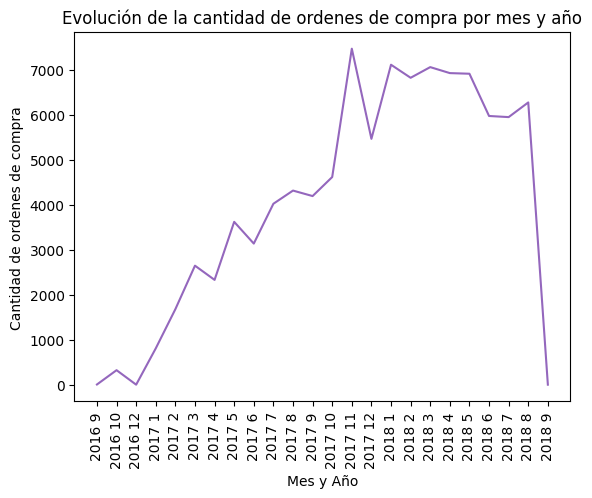

In [33]:
#Continuando con el analisis se busca ir un poco más en detalle y analizar la cantidad de compras por mes para cada año, de modo tal de ver la evolucion en el tiempo de las ordenes de compra.
df_m = df1[['month','year', 'order_id']]
month = df_m.groupby(['month', 'year'])['order_id'].count().reset_index()
month = month.sort_values(['year', 'month'])
month['month'] = month['month'].astype(str)
month['year'] = month['year'].astype(str)
month['month-year'] = month['year'] + ' ' + month['month']
c = sns.lineplot(data=month, x='month-year', y='order_id', color='C4')
plt.ylabel('Cantidad de ordenes de compra')
plt.xlabel('Mes y Año')
plt.title('Evolución de la cantidad de ordenes de compra por mes y año')
plt.xticks(rotation=90)



Este grafico es complementario al grafico anterior, vemos la cantidad de ordenes de compra por mes para cada año. Tal como vimos en el grafico anterior, disponemos de datos completos para 2017, donde se ve una tendencia creciente a lo largo del año, en este gráfico al poder tener datos mensuales, vemos como fluctuan las compras mes a mes, donde vemos picos en algunos meses como en marzo y noviembre.
En cuanto a los datos de 2018, aqui podemos ver que aunque tenemos datos de Q3 podemos intuir que la cobertura del mes de septiembre no es buena debido a la gran caida. Y en cuanto al año 2016, vemos que tenemos datos de septiembre, por lo cual para Q3 no hay datos completos, y para Q4 solo tenemos datos de octubre y diciembre, donde en diciembre parecen ser incompletos, y no hay datos disponibles de noviembre.

<ipython-input-34-f5d4e5c5281d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="day_name", y="order_id", data=day, palette='plasma')


Text(0.5, 1.0, 'Cantidad de ordenes de compra acumulados por día de la semana')

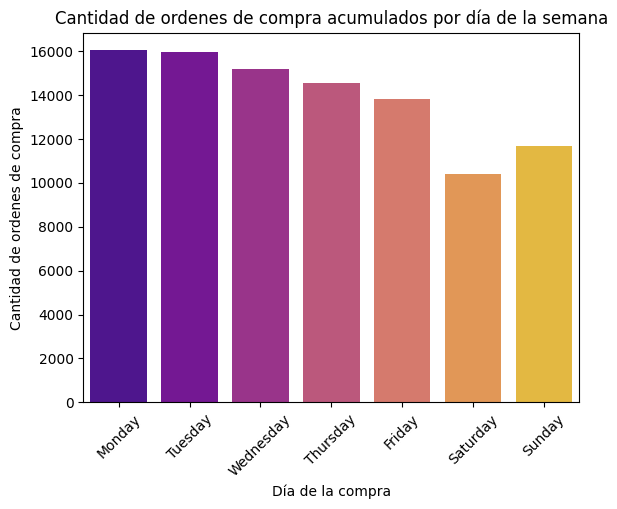

In [34]:
#En este paso se calcula la cantidad de ordenes de compra por día de la semana sin distinguir el año, de modo tal de poder identificar si hay días especificos donde los consumidores realizan mas compras online.
day= df1[['day_name', 'order_id']]
day = day.groupby(['day_name'])['order_id'].count().reset_index()
weekday = pd.CategoricalDtype(['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
day['day_name'] = day['day_name'].astype(weekday)
ax = sns.barplot(x="day_name", y="order_id", data=day, palette='plasma')
plt.xticks(rotation=45)
plt.xlabel('Día de la compra')
plt.ylabel('Cantidad de ordenes de compra')
plt.title('Cantidad de ordenes de compra acumulados por día de la semana')

En este gráfico podemos ver la cantidad de compras registradas para todos los periodos (2016, 2017 y 2018) por día.
Como conclusión podemos decir que la mayor cantidad de compras online se realizan al inicio de la semana, y estas van disminuyendo hacia el fin de semana, con cierta recuperación el día domingo.

In [35]:
df1['timeday'].unique()

['Morning', 'Afternoon', 'Night', 'Dawn']
Categories (4, object): ['Dawn' < 'Morning' < 'Afternoon' < 'Night']

<ipython-input-36-206e2191811b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="timeday", y="order_id", data=time, palette='plasma')


Text(0.5, 1.0, 'Cantidad de ordenes de compra acumulados por momento del día de la compra')

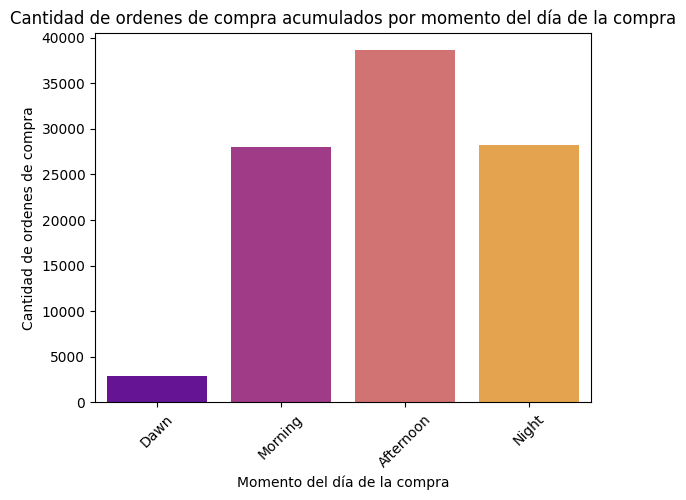

In [36]:
#Dado que en el grafico anterior analizamos por día de la semana, en este paso se calcula la cantidad de ordenes de compra por momento del día.
time= df1[['timeday', 'order_id']]
time = time.groupby(['timeday'])['order_id'].count().reset_index()
ax = sns.barplot(x="timeday", y="order_id", data=time, palette='plasma')
plt.xticks(rotation=45)
plt.xlabel('Momento del día de la compra')
plt.ylabel('Cantidad de ordenes de compra')
plt.title('Cantidad de ordenes de compra acumulados por momento del día de la compra')

En este gráfico podemos ver la cantidad de compras registradas para todos los periodos (2016, 2017 y 2018) por momento del día.
Como conclusión podemos decir que la mayor cantidad de compras online se realizan durante la tarde, en segundo lugar se encuentran al mismo nivel la mañana y la noche, y en el momento del día que se hacen menos compras online es al amanecer.

**Conclusion analisis temporal:** como primer insight podemos decir que la cantidad de compras online aumenta en el tiempo, no se ve estacionalidad en el consumo, lo cual debe estar relacionado con que se venden todo tipo de articulos, pero lo que si se ve es que hay mayor tendencia a que las compras se realicen durante la tarde y en los primeros días habiles de la semana.

# Analisis sobre el precio de los productos y el precio del envio

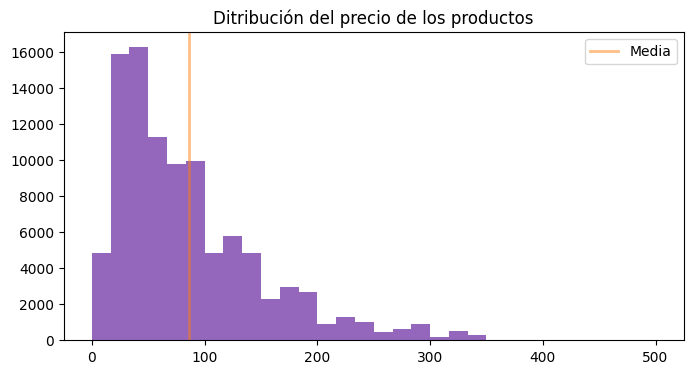

In [37]:
#Con el fin de analizar el precio de los productos, se realiza un histograma
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df1['price'], range=(0, 500), bins=30, color='C4')
mean_price = df1['price'].mean()
ax.axvline(mean_price, color='C1', alpha=0.5, linewidth=2, label='Media')
ax.set_title('Ditribución del precio de los productos')
ax.legend()

In [38]:
df1['price'].max()

349.8

En este grafico podemos ver la distribucion de la variable precio, tal como vemos presenta una distribucion asimetrica hacia la derecha, donde la cola a la derecha de la media es mas larga que la cola hacia la izquierda de la media.
También es importante destacar que el precio maximo es aproximadamente de 350 reales.

In [39]:
#En este paso se calcula la cantidad de productos agrupando por orden de compra y precio del envio, de modo tal de analizar si se encuentra alguna relación entre la cantidad de productos y el costo del envio.
envio = df1[['order_id', 'freight_value', 'product_id']]
envio = envio.groupby(['order_id', 'freight_value'])['product_id'].count().reset_index()
envio.rename(columns={'product_id':'cantidad de productos por orden de compra', 'freight_value':'costo_flete'}, inplace=True)
envio

,order_id,costo_flete,cantidad de productos por orden de compra
0,0,13.29,1
1,1,19.93,1
2,2,17.87,1
3,3,12.79,1
4,4,18.14,1
...,...,...,...
87039,98659,34.19,4
87040,98660,20.03,1
87041,98663,16.95,1
87042,98664,8.72,1


<ipython-input-40-3606312598cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.barplot(data=envio, x="cantidad de productos por orden de compra", y="costo_flete", palette='plasma')


Text(0.5, 1.0, 'Relación entre el costo del flete y la cantidad de productos en cada orden')

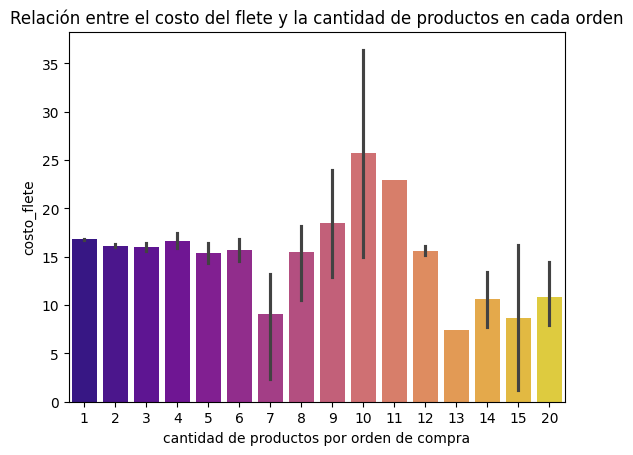

In [40]:
# En este paso se realiza un grafico de barras donde podemos analizar la relacion entre el costo del flete y la cantidad de productos por cada orden.
g= sns.barplot(data=envio, x="cantidad de productos por orden de compra", y="costo_flete", palette='plasma')
plt.title('Relación entre el costo del flete y la cantidad de productos en cada orden')

Lo que podemos ver es que tenemos más observaciones dentro del grupo de 9 productos por orden de compra, pero a su vez vemos que la vela es muy larga por lo cual vemos que dentro de esas ordenes de compra con 9 productos el costo del flete es muy disperso, en cambio para las ordenes de compra con 13 productos el costo del flete esta muy concentrado, por lo que podriamos pensar que superando x cantidad de productos el costo es fijo, o 'gratis'.

## **HIPOTESIS**

Hipotesis: La venta de un producto online depende de su tamaño y peso, y de la forma en la que el producto se publica en la web (cantidad de fotos, extensión de la descripcion)

Entonces las preguntas a responder que se desprenden de esta hipotesis son:
1) ¿El tamaño  y peso influye en la probabilidad de venta online del producto?
2) ¿La influencia del tamaño y el peso del producto sobre su probabilidad de venta online, es exclusivamente por el costo de envio?
3) ¿La forma en la que se publica el producto aumenta/reduce su probabilidad de venta?
4) ¿La forma en la que se publica el producto online, afecta en igual medida a todos los tipos de productos?


En pos de responder a las preguntas planteadas se proponen los siguientes gráficos:

Text(0, 0.5, 'precio del envio')

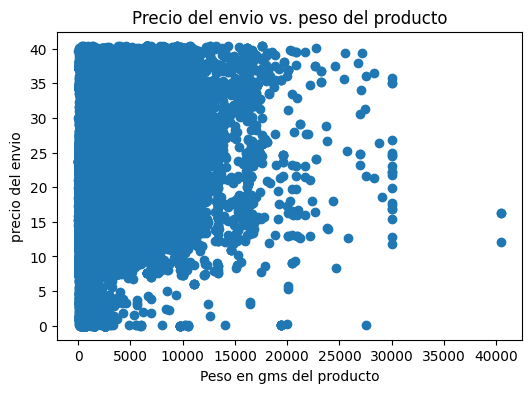

In [41]:
#En este paso se grafica un scatterplot entre el precio del envio y el peso del producto
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df1['product_weight_g'], df1.freight_value)
ax.set_title('Precio del envio vs. peso del producto')
ax.set_xlabel('Peso en gms del producto')
ax.set_ylabel('precio del envio')

En este grafico se busca analizar si existe un relación entre el precio del envio del producto y el peso del producto. A simple vista no se ve una relación clara.
También podemos ver que hay muchas observaciones, por lo cual en los graficos a continuación intentaremos analizar por tipo de producto para reducir la cantidad de observaciones y segmentar la muestra.

In [42]:
df1['product_category_name'].nunique()

73

In [43]:
#df1['product_category_name'].unique()

In [44]:
#Con el fin de profundizar el analisis se seleccionan 5 categorias de bienes muy distintas entre si:
perfu = df1[df1['product_category_name']=='perfumaria']
electro = df1[df1['product_category_name']=='eletrodomesticos_2']
deco = df1[df1['product_category_name']=='moveis_decoracao']
cons = df1[df1['product_category_name']=='construcao_ferramentas_jardim']
cocina = df1[df1['product_category_name']=='la_cuisine']

In [45]:
df1

,order_id,order_item_id,product_id,seller_id,customer_id,price,freight_value,order_status_num,product_category_name_num,year,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_name_lenght,customer_city,customer_state
0,0,1,8628,854,23516,58.90,13.29,2,26,2017,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,58.0,campos dos goytacazes,RJ
1,7352,1,8628,854,89210,55.90,17.96,2,26,2017,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,58.0,jatai,GO
2,32057,1,8628,854,30412,64.90,18.33,2,26,2018,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,58.0,belo horizonte,MG
3,42988,1,8628,854,18604,58.90,16.17,2,26,2017,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,58.0,sao jose dos pinhais,PR
4,48148,1,8628,854,56077,58.90,13.29,2,26,2017,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,58.0,conselheiro lafaiete,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112642,98626,2,30053,796,3067,19.00,15.79,2,12,2017,...,542.0,3.0,150.0,16.0,9.0,14.0,brinquedos,32.0,rio de janeiro,RJ
112643,98628,1,32628,1443,43662,35.99,16.60,2,2,2018,...,1412.0,1.0,1850.0,20.0,20.0,20.0,alimentos_bebidas,52.0,piraquara,PR
112644,98632,1,16559,850,89761,146.90,15.20,2,16,2017,...,1132.0,2.0,350.0,18.0,15.0,16.0,casa_construcao,52.0,uberlandia,MG
112646,98639,1,22725,25,6845,99.00,13.52,2,54,2018,...,308.0,1.0,2300.0,37.0,30.0,20.0,moveis_decoracao,30.0,sao jose dos pinhais,PR


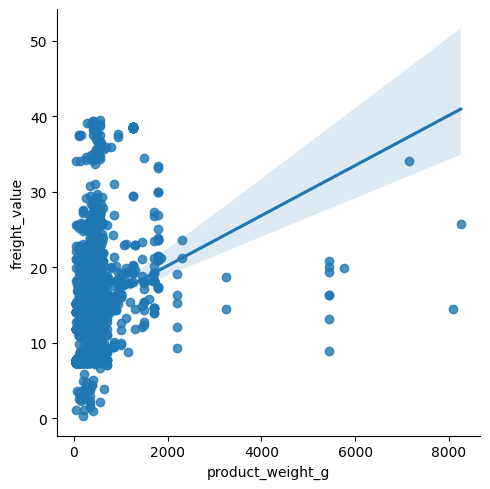

In [46]:
#En este caso se realiza un scatterplot entre el precio del envio y el peso de los productos de perfumeria
sns.lmplot(data=perfu, x='product_weight_g', y='freight_value')


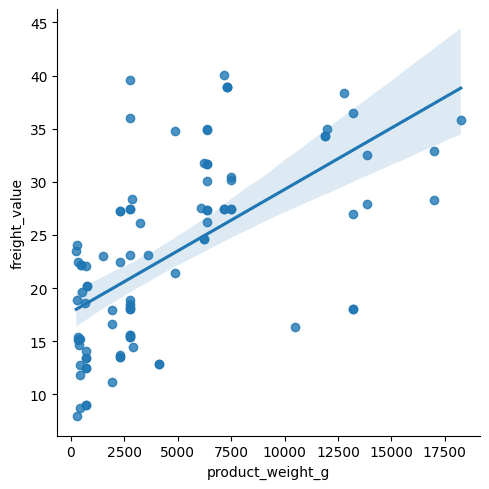

In [47]:
#En este caso se realiza un scatterplot entre el precio del envio y el peso de los productos de electro
sns.lmplot(data=electro, x='product_weight_g', y='freight_value')


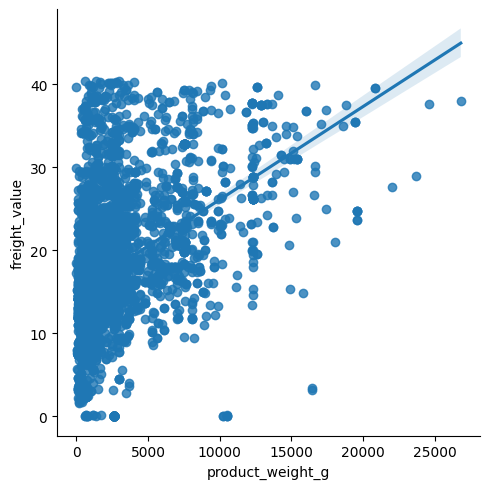

In [48]:
#En este caso se realiza un scatterplot entre el precio del envio y el peso de los productos de decoración
sns.lmplot(data=deco, x='product_weight_g', y='freight_value')

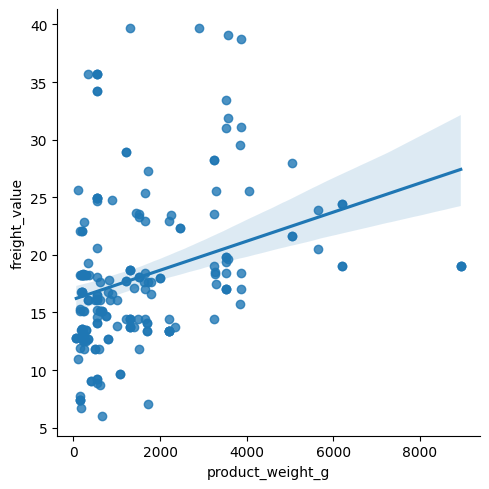

In [49]:
#En este caso se realiza un scatterplot entre el precio del envio y el peso de los productos de construcción
sns.lmplot(data=cons, x='product_weight_g', y='freight_value')

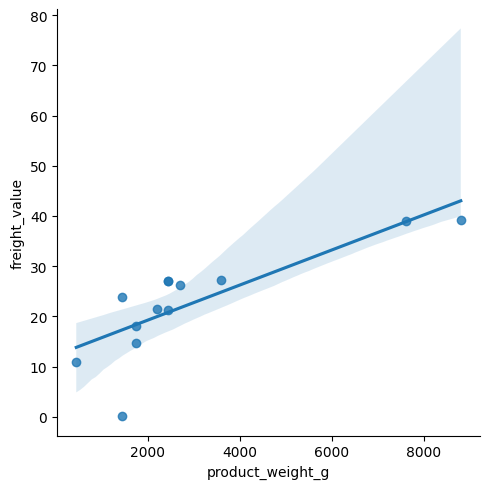

In [50]:
#En este caso se realiza un scatterplot entre el precio del envio y el peso de los productos de cocina
sns.lmplot(data=cocina, x='product_weight_g', y='freight_value')

Como conclusíon, vemos que en primer lugar la base cuenta con datos de 73 categorias de productos, para estas cinco categorias de ejemplo no se ve tampoco una relación clara, pero si por ejemplo para el caso de electro vemos que se ve una tendencia un poco más clara (una relación positiva entre el peso y el precio del envio) pero también vemos que a medida que aumenta el peso del producto aumenta la dispersión del precio del envio.
Por otro lado podemos ver que el maximo peso de los productos varia por categoria, donde el maximo peso de los electrodomesticos es 30mil gramos, mientras que en el caso de perfumeria el máximo es 16 mil gramos donde solo hay una observación (un outlier) pero el resto de los bienes estan por debajo de los 8mil gramos.

In [52]:
df2 = df1[['product_weight_g', 'product_height_cm', 'freight_value', 'order_id', 'product_id']]

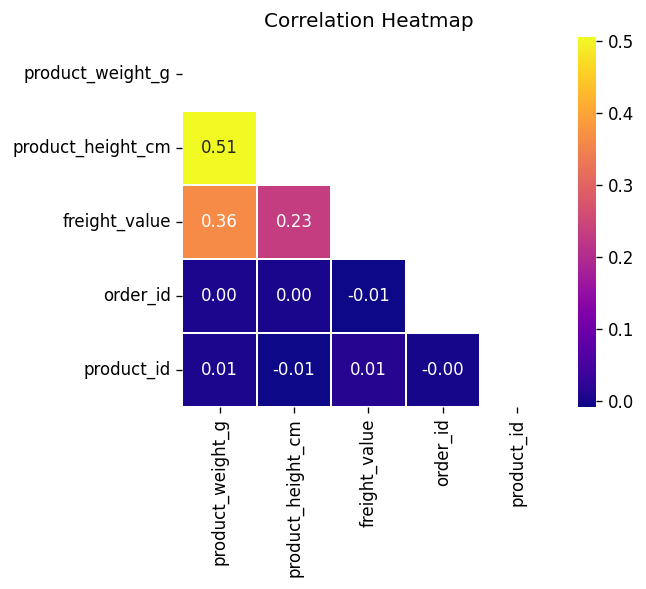

In [53]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df2.corr(),dtype = bool))
sns.heatmap(df2.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
#Con el fin de analizar si existe relación entre la extención de la descripción del producto y la venta del mismo, se realiza un count de productos vendidos por tamaño de la descripción
count = df1[['product_description_lenght', 'product_id']]
count1 = count.groupby('product_description_lenght').count().reset_index()
count1

,product_description_lenght,product_id
0,4.0,6
1,8.0,2
2,15.0,1
3,20.0,5
4,26.0,2
...,...,...
2759,3954.0,1
2760,3956.0,3
2761,3963.0,1
2762,3985.0,3


<Axes: xlabel='product_description_lenght', ylabel='product_id'>

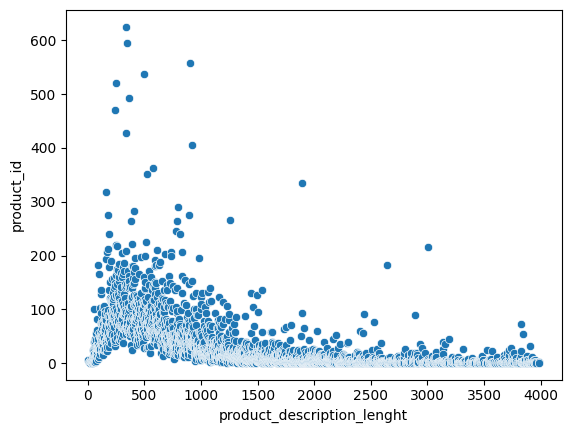

In [55]:
#En este caso se realiza un scatterplot entre la cantidad de veces que se vende un producto y la extensión de la descripçión del mismo en su publicacion:
sns.scatterplot(data=count1, x='product_description_lenght', y='product_id')

En este grafico se busca analizar si los productos más vendidos son los que tienen una descripción mas larga, no podemos establecer ninguna relación, pero si vemos que el producto más vendido (casi 700 unidades) tiene una descripcion de entre 0 y 500 palabras, siendo que hay productos con descripciones de hasta 4000 palabras.
También vemos que la cantidad de productos vendidos sube entre 0 y 1000 palabras y ya hacia las 1500 palabras de extension vuelve a descender.

Aunque no vemos una relación lineal, podemos decir que una mayor extension de la descripcón no garantiza mayor venta del producto, y tampoco una descripción nula.

Como conclusión, podemos decir que es interesante analizar por tipo de producto para descubrir que tipo de bienes son los más vendidos de manera online. También es importante el momento del día o de la semana, por lo cual eso nos da un insight de que probablemente hay que dirigir la estrategia de marketing hacia esos momentos.


In [67]:
df3 = df1[['product_description_lenght',  'product_photos_qty', 'order_id', 'product_id']]
df3 = df3.groupby(['product_description_lenght',  'product_photos_qty'])[['order_id', 'product_id']].count().reset_index()
df3

,product_description_lenght,product_photos_qty,order_id,product_id
0,4.0,1.0,2,2
1,4.0,2.0,4,4
2,8.0,1.0,2,2
3,15.0,1.0,1,1
4,20.0,1.0,5,5
...,...,...,...,...
8208,3954.0,1.0,1,1
8209,3956.0,1.0,3,3
8210,3963.0,1.0,1,1
8211,3985.0,1.0,3,3


In [74]:
corr = df1[['order_id', 'price', 'product_id', 'product_category_name_num', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_name_lenght']]

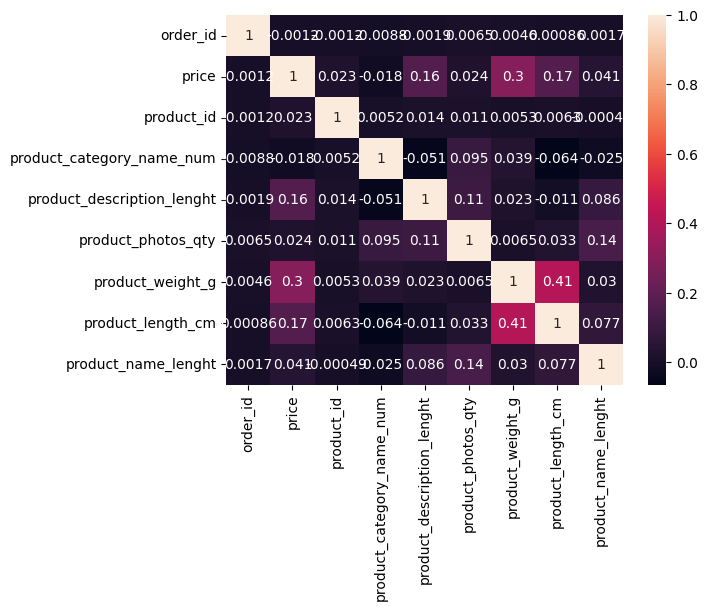

In [75]:
sns.heatmap(corr.corr(), annot=True);

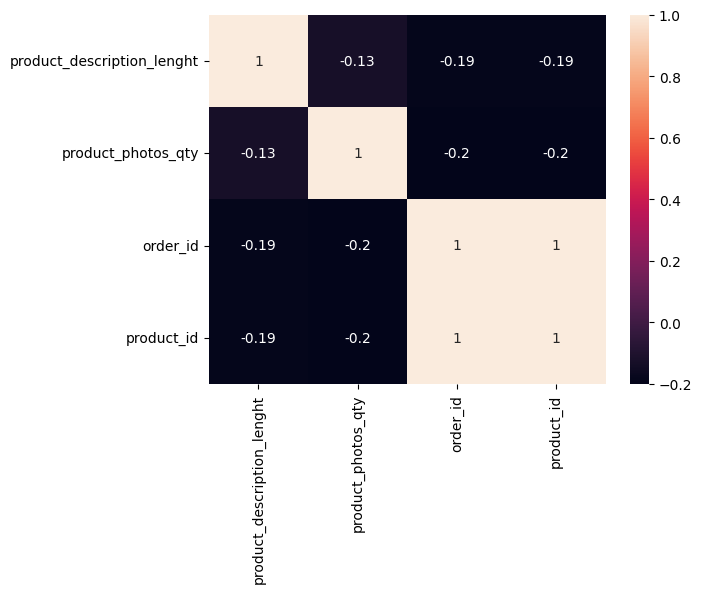

In [71]:
sns.heatmap(df3.corr(), annot=True);

# Desafio Algoritmos y validacion
Con el fin de entrenar los datos vamos a probar un modelo de regresion para estimar el precio de envio del producto en base a las caracteristicas de las ordenes de compra.

In [ ]:
#En este paso se seleccionan las variables de interes a la hora de correr el modelo
df1 = df1[['order_id', 'product_id', 'seller_id', 'price', 'freight_value', 'customer_id', 'product_category_name_num', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_height_cm', 'year', 'quarter', 'month', 'day', 'hour']]

In [ ]:
columns = ['price', 'freight_value', 'product_weight_g', 'product_height_cm', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97656 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    97656 non-null  int32  
 1   product_id                  97656 non-null  int32  
 2   seller_id                   97656 non-null  int16  
 3   price                       97656 non-null  float64
 4   freight_value               97656 non-null  float64
 5   customer_id                 97656 non-null  int32  
 6   product_category_name_num   97656 non-null  int64  
 7   product_name_lenght         97656 non-null  float64
 8   product_description_lenght  97656 non-null  float64
 9   product_photos_qty          97656 non-null  float64
 10  product_weight_g            97656 non-null  float64
 11  product_height_cm           97656 non-null  float64
 12  year                        97656 non-null  int32  
 13  quarter                     97656 n

In [ ]:
#En este paso creamos el df_x donde ponemos todas las variables explicativas que consideramos importantes para determinar el valor del envio de un producto
df_x = df1.copy()
df_x = df_x.drop(columns= ['freight_value'])
df_x

,order_id,product_id,seller_id,price,customer_id,product_category_name_num,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_height_cm,year,quarter,month,day,hour
0,0,8628,854,58.90,23516,26,58.0,598.0,4.0,650.0,9.0,2017,3,9,13,8
1,7352,8628,854,55.90,89210,26,58.0,598.0,4.0,650.0,9.0,2017,2,6,28,11
2,32057,8628,854,64.90,30412,26,58.0,598.0,4.0,650.0,9.0,2018,2,5,18,10
3,42988,8628,854,58.90,18604,26,58.0,598.0,4.0,650.0,9.0,2017,3,8,1,18
4,48148,8628,854,58.90,56077,26,58.0,598.0,4.0,650.0,9.0,2017,3,8,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112642,98626,30053,796,19.00,3067,12,32.0,542.0,3.0,150.0,9.0,2017,3,8,31,21
112643,98628,32628,1443,35.99,43662,2,52.0,1412.0,1.0,1850.0,20.0,2018,1,1,2,13
112644,98632,16559,850,146.90,89761,16,52.0,1132.0,2.0,350.0,15.0,2017,1,3,15,17
112646,98639,22725,25,99.00,6845,54,30.0,308.0,1.0,2300.0,30.0,2018,3,8,18,10


In [ ]:
#Creamos el df_y donde se encuentra el valor que deseamos estimar que es el precio del envio del producto
df_y = df1[['freight_value']]
df_y

,freight_value
0,13.29
1,17.96
2,18.33
3,16.17
4,13.29
...,...
112642,15.79
112643,16.60
112644,15.20
112646,13.52


In [ ]:
#En este paso probamos un modelo de regresion linear para estimar el precio del envio de un producto, generando a su vez un grupo de train y un grupo de test, para testear los resultados del modelo y ver que tan bien estima
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
#A continuación se calculan diferentes metricas para evaluar los resultados del modelo
print(y_test['freight_value'].mean())

16.716352868894425


In [ ]:
#Error absoluto medio
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 4.454668677414172


Obtenemos un MAE de 4.4, lo cual quiere decir que la diferencia entre el valor predicho y el valor objetivo en promedio es de 4.4. Es importante tener en cuenta que el valor de los envios promedio de nuestra muestra test es de 16.7 reales. Por lo cual vemos que el error es significativo. Esta medida se expresa en la misma unidad que la variable predicha.

In [ ]:
#Se calcula el error quadratico medio
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 37.349524576284146


In [ ]:
#Error cuadratico medio
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 1.810160091308266


In [ ]:
#Se calcula el R2 para analizar en que % nuestro modeloe explica la variabilidad del precio del envio.
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)


0.1788862092244713


En este caso podemos decir que el modelo no es bueno para predecir el precio del envio, ya que tenemos un R2 muy bajo donde nuestro modelo solo explica un 17% de la variabilidad del precio del envio.

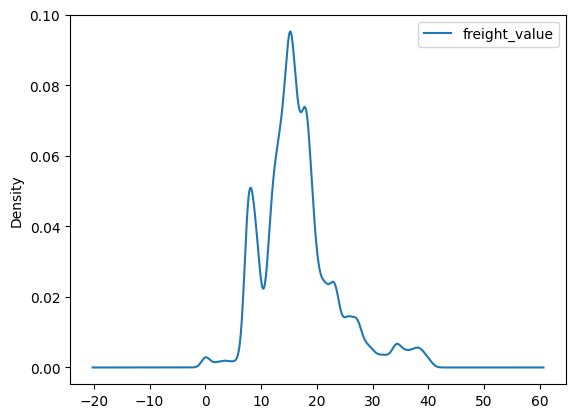

In [ ]:
#A continuación se realizan graficos de densidad para el grupo de train, de test, y para el predicho
ax = y_train.plot.kde()

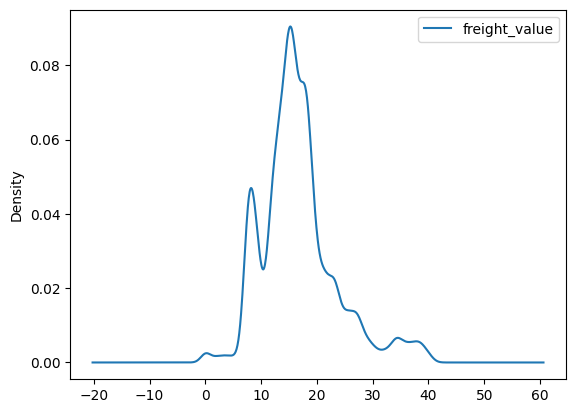

In [ ]:
ax = y_test.plot.kde()

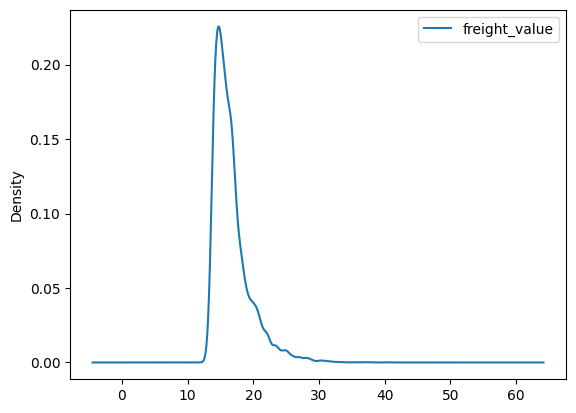

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=["freight_value"])
ax = y_pred.plot.kde()

Al realizar los graficos de densidad lo que podemos comprobar primero es que tan parecido es el grupo de test con el de train, y vemos que el grupo de test es una buena muestra del df ya que los graficos de densidad son casi iguales.
Luego al ver como se comporta la variable predicha vemos que el modelo no ajusta lo suficiente a los datos, vemos que el pico se produce en los mismos valres entre 10 y 30, particularmente cercano a 15, pero no estima correctamente los valores entre 0 y 10, y tampoco los valores entre 30 y 40.



## METADATA



In [ ]:
df1.describe()

,order_id,product_id,seller_id,price,freight_value,customer_id,product_category_name_num,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_height_cm,year,quarter,month,day,hour
count,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000,97656.000000
mean,49319.730186,16436.153314,1510.041175,86.220672,16.679746,49299.794483,36.709818,48.774934,760.676077,2.192492,1535.882588,15.288206,2017.539629,2.352052,6.019241,15.596778,15.110459
std,28468.832073,9453.335539,897.466048,65.568481,6.718429,28526.917160,22.131976,10.056890,632.023217,1.712969,2532.244237,11.646927,0.505144,1.062660,3.234274,8.667000,4.850952
min,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,2.000000,2016.000000,1.000000,1.000000,1.000000,1.000000
25%,24646.750000,8343.000000,756.000000,38.000000,12.760000,24653.500000,13.000000,42.000000,341.000000,1.000000,250.000000,8.000000,2017.000000,1.000000,3.000000,8.000000,11.000000
50%,49357.500000,16289.000000,1505.000000,68.000000,15.720000,49258.500000,32.000000,52.000000,584.000000,1.000000,600.000000,12.000000,2018.000000,2.000000,6.000000,16.000000,15.000000
75%,73968.250000,24670.000000,2365.000000,117.900000,19.190000,74018.250000,55.000000,57.000000,946.000000,3.000000,1550.000000,20.000000,2018.000000,3.000000,8.000000,23.000000,19.000000
max,98665.000000,32949.000000,3094.000000,349.800000,40.430000,98665.000000,73.000000,76.000000,3988.000000,20.000000,40425.000000,105.000000,2018.000000,4.000000,12.000000,31.000000,23.000000
